# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import *
import scipy
from scipy import stats

df = pd.read_csv('data/human_body_temperature.csv')

In [3]:
print(df.head())

   temperature gender  heart_rate
0         99.3      F        68.0
1         98.4      F        81.0
2         97.8      M        73.0
3         99.2      F        66.0
4         98.0      F        73.0


<h3> Is the distribution of body temperatures normal? </h3>

(array([ 4.,  6., 15., 26., 30., 30., 15.,  1.,  2.,  1.]),
 array([ 96.3 ,  96.75,  97.2 ,  97.65,  98.1 ,  98.55,  99.  ,  99.45,
         99.9 , 100.35, 100.8 ]),
 <a list of 10 Patch objects>)

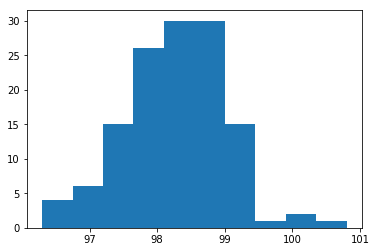

In [6]:
plt.hist(df['temperature'])

The distribution looks mostly normal but somewhat left-skewed

<h3> Is the sample size large? Are the observations independent? </h3>

In [7]:
len(df)

130

"The Large Enough Sample Condition tests whether you have a large enough sample size compared to the population. A general rule of thumb for the Large Enough Sample Condition is that n≥30, where n is your sample size. However, it depends on what you are trying to accomplish and what you know about the distribution."

https://www.statisticshowto.datasciencecentral.com/large-enough-sample-condition/

We don't know if the observations are independent

*Is the true population mean really 98.6 degrees F? First, try a bootstrap hypothesis test.*

In [20]:
df_shifted = df['temperature'] - np.mean(df['temperature']) + 98.6
print(df_shifted.head())

0    99.650769
1    98.750769
2    98.150769
3    99.550769
4    98.350769
Name: temperature, dtype: float64


In [22]:
def diff_from_normal(data, normal = 98.6):
    return np.mean(data) - normal

In [23]:
diff_obs = diff_from_normal(df['temperature'])

In [24]:
diff_obs

-0.35076923076921673

In [25]:
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

In [30]:
bs_replicates = draw_bs_reps(df_shifted, diff_from_normal, 100000)

In [31]:
p_value = np.sum(bs_replicates <= diff_obs) / 100000
print(p_value)

0


The low p-value appears to indicate that the mean is indeed 98.6

*Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?*

We would use a one-sample test since we are comparing a set of data to a single number

*In this situation, is it appropriate to use the  t or  z statistic?*

"Normally, you use the t-table when the sample size is small (n<30) and the population standard deviation (σ) is unknown. Z-scores are based on your knowledge about the population’s standard deviation and mean."

https://math.stackexchange.com/questions/1817980/how-to-know-when-to-use-t-value-or-z-value

In [37]:
onesample_results = scipy.stats.ttest_1samp(df['temperature'], 98.6)

matrix_onesample = [
    ['', 'Test Statistic', 'p-value'],
    ['Sample Data', onesample_results[0], onesample_results[1]]
]
print(matrix_onesample)

[['', 'Test Statistic', 'p-value'], ['Sample Data', -5.4548232923645195, 2.4106320415561276e-07]]


p-value is 2.4E-7

*Now try using the other test. How is the result be different? Why?*

In [39]:
(98.6 - np.mean(df['temperature']))/np.std(df['temperature'])

0.48027041116080765

The z score is 0.480, and the corresponding p-value is .631014 (two tailed) and 0.3155 (one-tailed)

The result is different because we do not know the population mean and standard deviation, which is used in the z-score

<h3> Draw a small sample of size 10 from the data and repeat both frequentist tests. </h3>

In [60]:
replicates = []
for i in range(10):
    #j = random.randint(0, len(df['temperature']))
    replicates.append(df['temperature'][i])
print(replicates)

[99.3, 98.4, 97.8, 99.2, 98.0, 99.2, 98.0, 98.8, 98.4, 98.6]


*Which one is the correct one to use?
What do you notice? What does this tell you about the difference in application of the  t and  z statistic?*

In [66]:
replicates_results = scipy.stats.ttest_1samp(replicates, 98.6)
replicates_results = [
    ['', 'Test Statistic', 'p-value'],
    ['Sample Data', replicates_results[0], replicates_results[1]]
]
print(replicates_results)

[['', 'Test Statistic', 'p-value'], ['Sample Data', -0.17381774143072845, 0.8658554880730941]]


The p-value is 0.866

In [68]:
(98.6 - np.mean(replicates))/np.std(replicates)

0.05793924714357616

The z score is 0.579, and the corresponding p-value is .562589 (two tailed) and .281295. (one-tailed)

The p-values change based on sample size.  The appropriate frequentist should be applied based on sample size

<h3>At what temperature should we consider someone's temperature to be "abnormal"?</h3>

One standard deviation seems like a good criterion for "abnormal" temperature

In [74]:
std = np.std(df['temperature'])
print("High range: " + str(98.6 + std))
print("Low range: " + str(98.6 - std))

High range: 99.3303577789
Low range: 97.8696422211


<h3>Is there a significant difference between males and females in normal temperature?</h3>

In [83]:
male = []
female = []
for i in range(len(df['temperature'])):
    if df['gender'][i] == 'M':
        male.append(df['temperature'][i])
    else:
        female.append(df['temperature'][i])

print("Male number:")
print(len(male))
print("Male mean:")
print(np.mean(male))
print("Male standard deviation")
print(np.std(male))
print("Female number:")
print(len(female))
print("Female mean:")
print(np.mean(female))
print("Female standard deviation")
print(np.std(female))

Male number:
65
Male mean:
98.10461538461537
Male standard deviation
0.6933598841828699
Female number:
65
Female mean:
98.39384615384614
Female standard deviation
0.7377464486428966


The significance level is 0.0230.  This value is less than p = 0.05, which suggests that the null hypothesis that the difference is 0 is true.

*What testing approach did you use and why?
Write a story with your conclusion in the context of the original problem.*

I used an online calculator and found the required values through simple calculations.